In [1]:
import math
import random
import matplotlib.pyplot as plt
from typing import Union
from copy import deepcopy
import numpy as np
import time
from tqdm import tqdm_notebook

X = 1.5
N = 2000
BORDER = 20

In [2]:
def plot_times(times, deg, name, save_to):
    plt.figure(figsize=(16, 8), dpi=80)
    
    X = np.arange(len(times))
    coef = np.polyfit(X, times, deg)
    y = np.polyval(coef, X)
    
    
    plt.plot(np.arange(len(times)), times, label='empirical')
    
    plt.plot(X, y, label='theoretical', linewidth=2)
    plt.ylabel("time (sec)")
    plt.xlabel("vector size")
    plt.title(name)
    plt.legend()
    plt.savefig(save_to)
    

In [3]:
def calc_times(func):
    times = []

    for n in tqdm_notebook(range(1, N+1)):
        vector = np.random.choice(range(0, BORDER), size=n, replace=True)

        start = time.time() 

        res = func(deepcopy(vector))

        t = time.time() - start

        times.append(t)
    
    return times
    
    

## constant function: O(1)

In [4]:
def f_const(vector: np.array) -> int:
    return 1

In [5]:
n = 10

vector = np.random.choice(range(0, BORDER), size=n, replace=True)
vector

array([ 1,  4,  1,  1,  6,  0, 17,  1,  1,  0])

In [6]:
f_const(deepcopy(vector))

1

In [7]:
times = calc_times(f_const)

/opt/anaconda3/envs/algorithms-RD-practise/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/2000 [00:00<?, ?it/s]

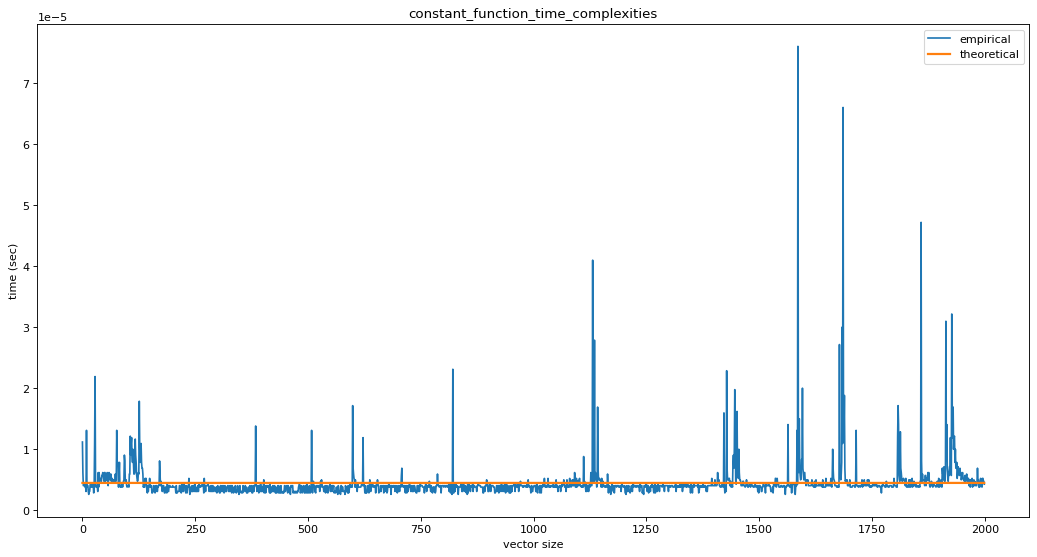

In [8]:
plot_times(times, deg=0, name="constant_function_time_complexities", save_to=f"./figures/constant_function_time_complexities.png")

## the sum of elements: O($n$)

In [9]:

def f_sum(vector: np.array) -> Union[float, int]:
    s = 0
    for el in vector:
        s += el
    return s


In [10]:
n = 10

vector = np.random.choice(range(0, BORDER), size=n, replace=True)
vector

array([ 8,  6, 18, 14, 11, 18, 13,  4, 18, 13])

In [11]:
f_sum(deepcopy(vector))

123

In [12]:
times = calc_times(f_sum)

/opt/anaconda3/envs/algorithms-RD-practise/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/2000 [00:00<?, ?it/s]

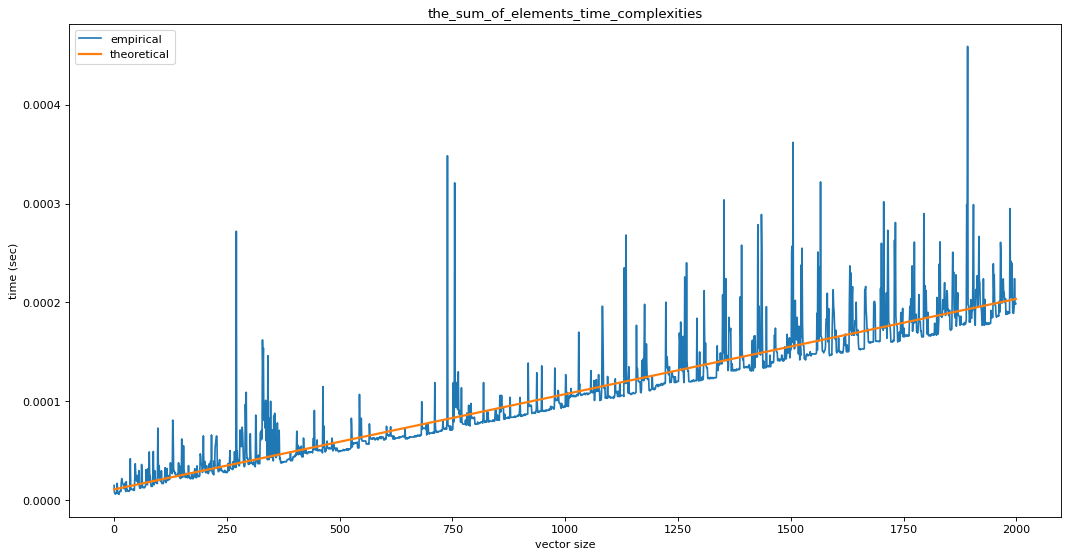

In [13]:
plot_times(times, deg=1, name="the_sum_of_elements_time_complexities", save_to=f"./figures/the_sum_of_elements_time_complexities.png")

## the product of elements: O($n$)

In [14]:
def f_product(vector: np.array) -> Union[float, int]:
    p = 1
    for el in vector:
        p *= el
    return p


In [15]:
n = 10

vector = np.random.choice(range(0, BORDER), size=n, replace=True)
vector


array([18, 12, 15, 15,  3,  8, 19,  7,  5,  3])

In [16]:
f_product(deepcopy(vector))

2326968000

In [17]:
times = calc_times(f_product)

/opt/anaconda3/envs/algorithms-RD-practise/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/2000 [00:00<?, ?it/s]

/opt/anaconda3/envs/algorithms-RD-practise/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.


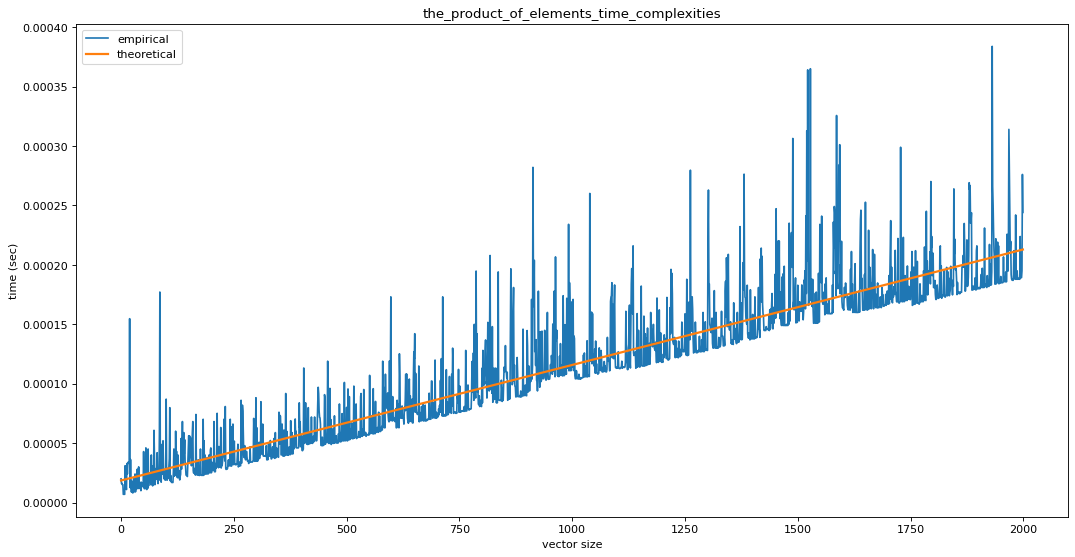

In [18]:
plot_times(times, deg=1, name="the_product_of_elements_time_complexities", save_to=f"./figures/the_product_of_elements_time_complexities.png")

## polynom, evaluating each term one by one: O($n^2$)

In [19]:
def f_poly_dummy(x: float, vector: np.array) -> Union[float, int]:
    n = vector.shape[0]
    res = 0
    for el_idx in range(0, n):

        part = 1
        for j in range(0, el_idx):
            part *= x

        res += vector[el_idx] * part

    return res


In [20]:
n = 10

vector = np.random.choice(range(0, BORDER), size=n, replace=True)
vector

array([ 1, 17,  8,  8, 12, 18, 10,  3, 12,  7])

In [21]:
func_poly_dummy = lambda vector: f_poly_dummy(x=X, vector=vector)
func_poly_dummy(deepcopy(vector))

1010.751953125

In [22]:
func_poly_dummy(deepcopy(vector)), np.polyval(deepcopy(vector)[::-1], X)

(1010.751953125, 1010.751953125)

In [23]:
times = calc_times(func_poly_dummy)

/opt/anaconda3/envs/algorithms-RD-practise/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/2000 [00:00<?, ?it/s]

/opt/anaconda3/envs/algorithms-RD-practise/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/envs/algorithms-RD-practise/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/envs/algorithms-RD-practise/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


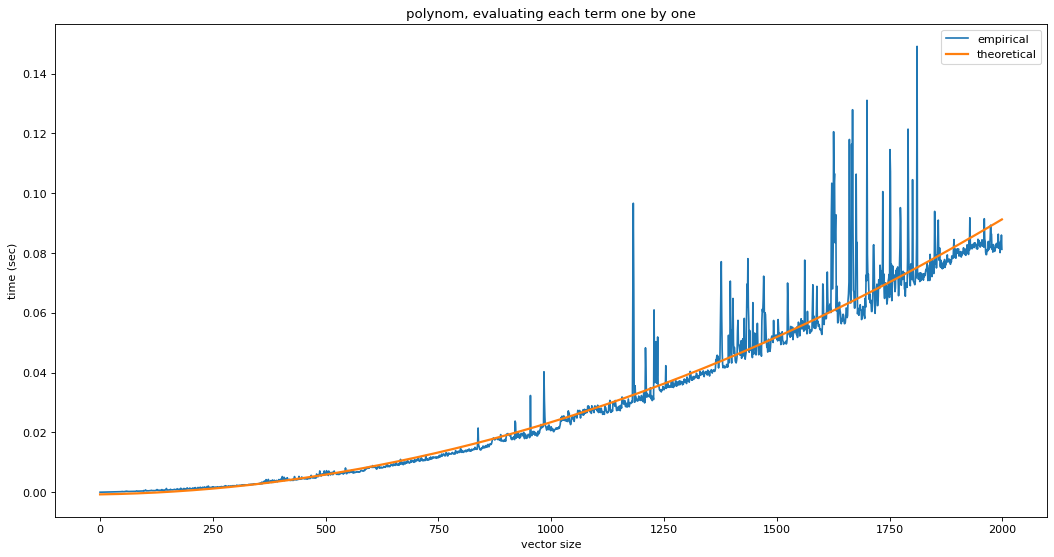

In [24]:
plot_times(times, deg=2, name="polynom, evaluating each term one by one", save_to=f"./figures/polynom_1by1_time_complexities.png")

## polynom, evaluating by Horner’s method: O($n$)


In [25]:
def f_poly_horner(x: float, vector: np.array) -> Union[float, int]:
    n = vector.shape[0]
    res = vector[n - 1]
    for el_idx in range(n - 2, -1, -1):
        res = x * res + vector[el_idx]
    return res

In [26]:
n = 10

vector = np.random.choice(range(0, BORDER), size=n, replace=True)
vector

array([ 7, 11,  7, 16,  9,  7, 10,  4, 19,  1])

In [27]:
func_poly_horner = lambda vector: f_poly_horner(x=X, vector=vector)
func_poly_horner(deepcopy(vector))

899.611328125

In [28]:
np.polyval(deepcopy(vector)[::-1], X)

899.611328125

In [29]:
times = calc_times(func_poly_horner)

/opt/anaconda3/envs/algorithms-RD-practise/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/2000 [00:00<?, ?it/s]

/opt/anaconda3/envs/algorithms-RD-practise/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


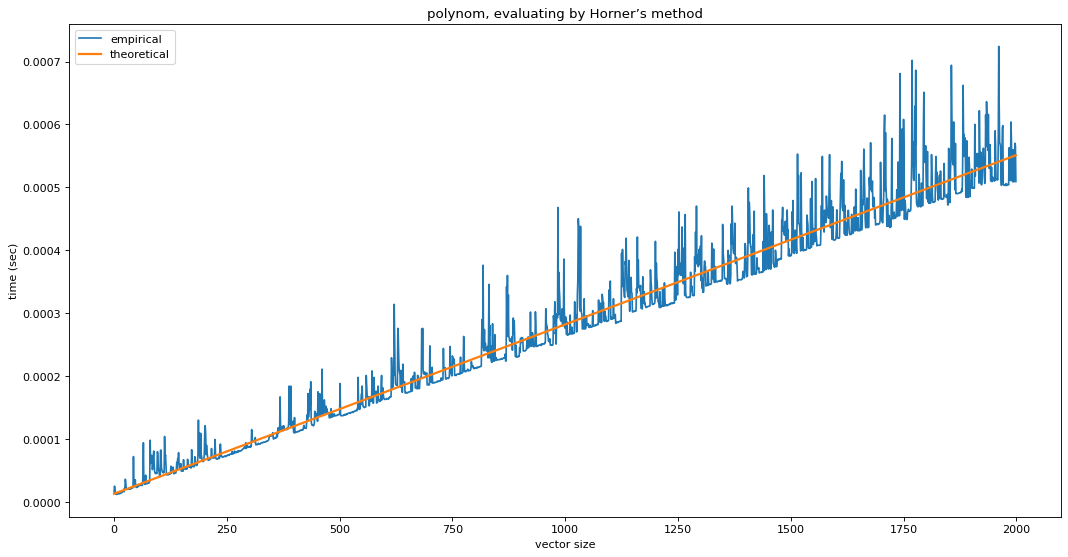

In [30]:
plot_times(times, deg=1, name="polynom, evaluating by Horner’s method", save_to=f"./figures/polynom_horner_time_complexities.png")

## theoretical time complexity of bubble sort: 
### - worst O($n^2$)
### - average O($n^2$)
### - best O($n$)

In [31]:
def bubble_sort(vector):
    n = vector.shape[0]
    swapped = True
    while swapped:
        swapped = False
        for i in range(n - 1):
            if vector[i] > vector[i + 1]:
                vector[i], vector[i + 1] = vector[i + 1], vector[i]
                swapped = True
    return vector

In [32]:
n = 10

vector = np.random.choice(range(0, BORDER), size=n, replace=True)
vector

array([ 3,  4,  1,  6,  9,  9,  6,  3, 13,  1])

In [33]:
bubble_sort(deepcopy(vector))

array([ 1,  1,  3,  3,  4,  6,  6,  9,  9, 13])

In [34]:
times_bubble_sort = calc_times(bubble_sort)

/opt/anaconda3/envs/algorithms-RD-practise/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/2000 [00:00<?, ?it/s]

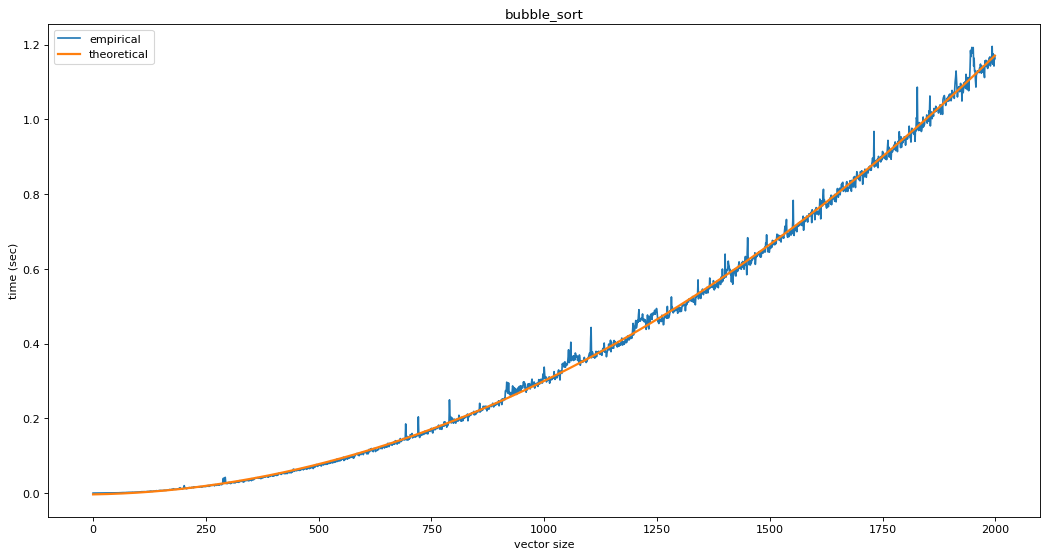

In [35]:
plot_times(times_bubble_sort, deg=2, name="bubble_sort", save_to=f"./figures/bubble_sort_time_complexities.png")

## theoretical time complexity of quick sort:
### - worst O($n^2$)
### - average O($n * logn$)
### - best O($n * logn$)

In [36]:
def quicksort(vector, start, end):
    '''Sorts the list from indexes start to end - 1 inclusive.'''
    if end - start > 1:
        p = partition(vector, start, end)
        quicksort(vector, start, p)
        quicksort(vector, p + 1, end)
    return vector


def partition(vector, start, end):
    pivot = vector[start]
    i = start + 1
    j = end - 1

    while True:
        while (i <= j and vector[i] <= pivot):
            i = i + 1
        while (i <= j and vector[j] >= pivot):
            j = j - 1

        if i <= j:
            vector[i], vector[j] = vector[j], vector[i]
        else:
            vector[start], vector[j] = vector[j], vector[start]
            return j


In [37]:
func_quicksort = lambda vector: quicksort(vector, start=0, end=vector.shape[0])
func_quicksort(deepcopy(vector))

array([ 1,  1,  3,  3,  4,  6,  6,  9,  9, 13])

In [38]:
vector = np.random.choice(range(0, BORDER), size=n, replace=True)
print(vector)
vector = func_quicksort(vector)
vector

[13 17 13 17 11 17  8  5 12  3]


array([ 3,  5,  8, 11, 12, 13, 13, 17, 17, 17])

In [39]:
times_quicksort = calc_times(func_quicksort)

/opt/anaconda3/envs/algorithms-RD-practise/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/2000 [00:00<?, ?it/s]

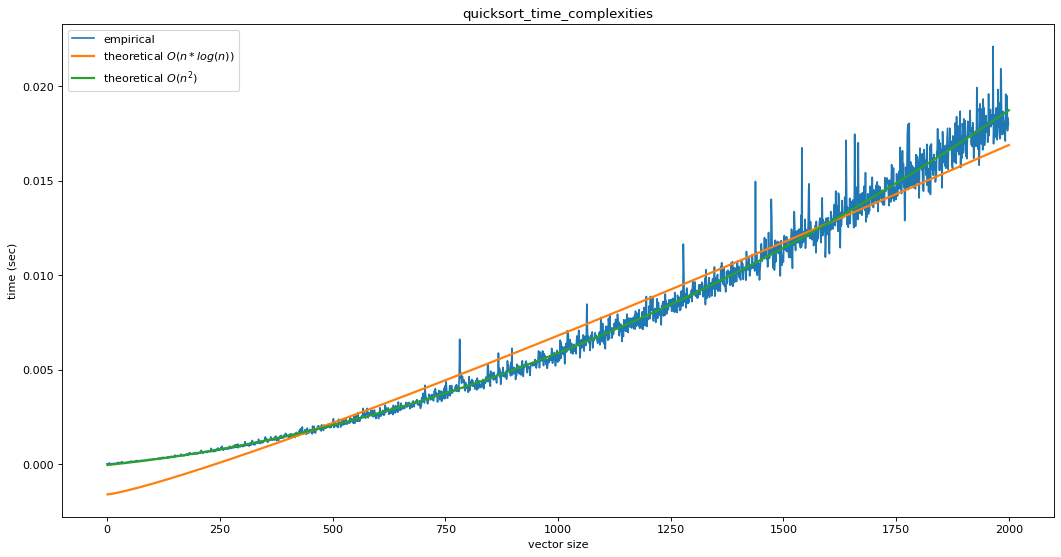

In [40]:
plt.figure(figsize=(16, 8), dpi=80)

plt.plot(np.arange(len(times_quicksort)), times_quicksort, label='empirical')

X = np.log(np.arange(1, len(times_quicksort)+1)) * np.arange(1, len(times_quicksort)+1)
coef = np.polyfit(X, times_quicksort, deg=1)
y = np.polyval(coef, X)

plt.plot(np.arange(1, len(times_quicksort)+1), y, label='theoretical $O(n*log(n))$', linewidth=2)


X = np.arange(1, len(times_quicksort)+1)
coef = np.polyfit(X, times_quicksort, deg=2)
y = np.polyval(coef, X)

plt.plot(np.arange(1, len(times_quicksort)+1), y, label='theoretical $O(n^2)$', linewidth=2)


plt.ylabel("time (sec)")
plt.xlabel("vector size")
plt.title("quicksort_time_complexities")
plt.legend()
plt.savefig(f"./figures/quicksort_time_complexities.png")

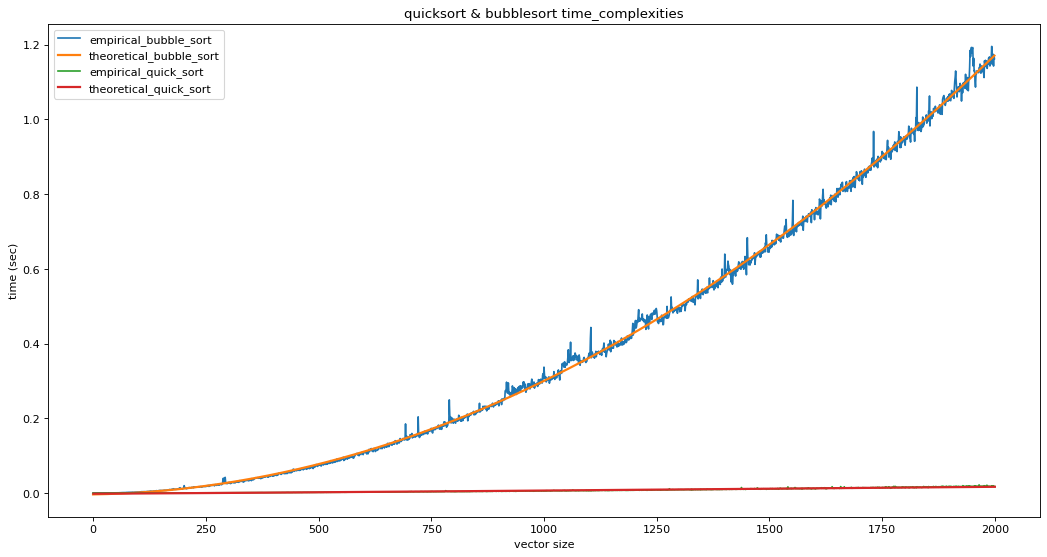

In [41]:
plt.figure(figsize=(16, 8), dpi=80)

X = np.arange(len(times_bubble_sort))
coef = np.polyfit(X, times_bubble_sort, 2)
y = np.polyval(coef, X)

plt.plot(np.arange(len(times_bubble_sort)), times_bubble_sort, label='empirical_bubble_sort')
plt.plot(X, y, label='theoretical_bubble_sort', linewidth=2)


X = np.log(np.arange(1, len(times_quicksort)+1)) * np.arange(1, len(times_quicksort)+1)
coef = np.polyfit(X, times_quicksort, deg=1)
y = np.polyval(coef, X)

plt.plot(np.arange(len(times_quicksort)), times_quicksort, label='empirical_quick_sort')
plt.plot(np.arange(1, len(times_quicksort)+1), y, label='theoretical_quick_sort', linewidth=2)


plt.ylabel("time (sec)")
plt.xlabel("vector size")
plt.title("quicksort & bubblesort time_complexities")
plt.legend()
plt.savefig(f"./figures/quicksort_n_bubblesort_time_complexities.png")

## theoretical time complexity of tim_sort:
### - worst O($n * logn$)
### - average O($n * logn$)
### - best O($n$)

In [42]:
MIN_MERGE = 32


def calc_min_run(n):
    """Returns the minimum length of a
    run from 23 - 64 so that
    the len(array)/min_run is less than or
    equal to a power of 2.

    e.g. 1=>1, ..., 63=>63, 64=>32, 65=>33,
    ..., 127=>64, 128=>32, ...
    """
    r = 0
    while n >= MIN_MERGE:
        r |= n & 1
        n >>= 1
    return n + r


# This function sorts array from left index to
# to right index which is of size atmost RUN
def insertion_sort(vector, left, right):
    for i in range(left + 1, right + 1):
        j = i
        while j > left and vector[j] < vector[j - 1]:
            vector[j], vector[j - 1] = vector[j - 1], vector[j]
            j -= 1


# Merge function merges the sorted runs
def merge(vector, l, m, r):
    # original array is broken in two parts
    # left and right array
    len1, len2 = m - l + 1, r - m
    left, right = [], []
    for i in range(0, len1):
        left.append(vector[l + i])
    for i in range(0, len2):
        right.append(vector[m + 1 + i])

    i, j, k = 0, 0, l

    # after comparing, we merge those two array
    # in larger sub array
    while i < len1 and j < len2:
        if left[i] <= right[j]:
            vector[k] = left[i]
            i += 1

        else:
            vector[k] = right[j]
            j += 1

        k += 1

    # Copy remaining elements of left, if any
    while i < len1:
        vector[k] = left[i]
        k += 1
        i += 1

    # Copy remaining element of right, if any
    while j < len2:
        vector[k] = right[j]
        k += 1
        j += 1


# Iterative tim_sort function to sort the
# vector[0...n-1] (similar to merge sort)
def tim_sort(vector):
    n = vector.shape[0]
    min_run = calc_min_run(n)

    # Sort individual subarrays of size RUN
    for start in range(0, n, min_run):
        end = min(start + min_run - 1, n - 1)
        insertion_sort(vector, start, end)

    # Start merging from size RUN (or 32). It will merge
    # to form size 64, then 128, 256 and so on ....
    size = min_run
    while size < n:
        # Pick starting point of left sub array. We
        # are going to merge vector[left..left+size-1]
        # and vector[left+size, left+2*size-1]
        # After every merge, we increase left by 2*size
        for left in range(0, n, 2 * size):

            # Find ending point of left sub array
            # mid+1 is starting point of right sub array
            mid = min(n - 1, left + size - 1)
            right = min((left + 2 * size - 1), (n - 1))

            # Merge sub array vector[left.....mid] &
            # vector[mid+1....right]
            if mid < right:
                merge(vector, left, mid, right)

        size = 2 * size
    return vector

In [43]:
vector = np.random.choice(range(0, BORDER), size=n, replace=True)
print(vector)
vector = tim_sort(vector)
vector

[ 2 10  8  5  6 19 17  0 13  4]


array([ 0,  2,  4,  5,  6,  8, 10, 13, 17, 19])

In [44]:
times_tim_sort = calc_times(tim_sort)

/opt/anaconda3/envs/algorithms-RD-practise/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/2000 [00:00<?, ?it/s]

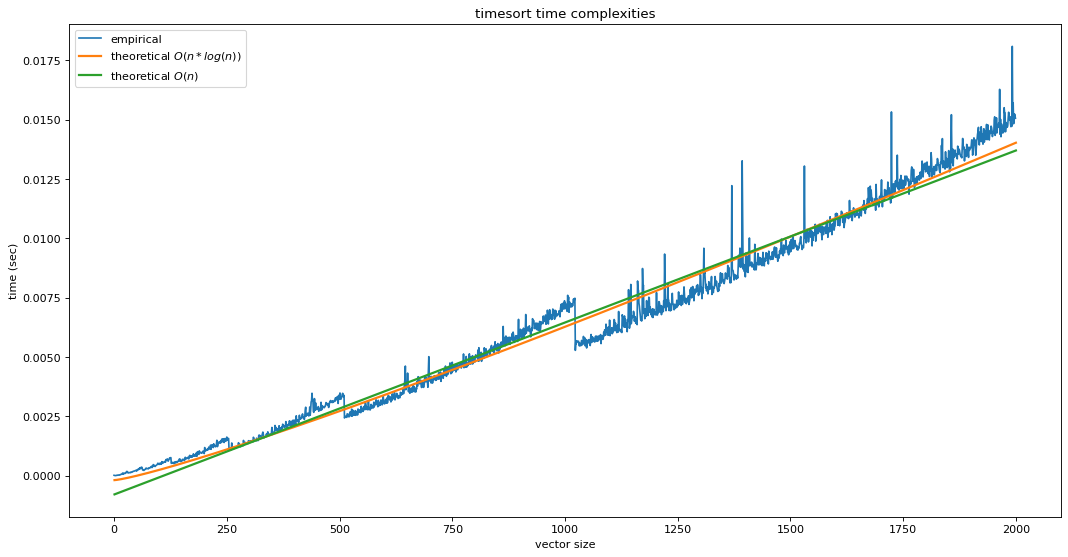

In [45]:
plt.figure(figsize=(16, 8), dpi=80)

plt.plot(np.arange(len(times_tim_sort)), times_tim_sort, label='empirical')

X = np.log(np.arange(1, len(times_tim_sort)+1)) * np.arange(1, len(times_tim_sort)+1)
coef = np.polyfit(X, times_tim_sort, deg=1)
y = np.polyval(coef, X)

plt.plot(np.arange(1, len(times_tim_sort)+1), y, label='theoretical $O(n*log(n))$', linewidth=2)


X = np.arange(1, len(times_tim_sort)+1)
coef = np.polyfit(X, times_tim_sort, deg=1)
y = np.polyval(coef, X)

plt.plot(np.arange(1, len(times_tim_sort)+1), y, label='theoretical $O(n)$', linewidth=2)


plt.ylabel("time (sec)")
plt.xlabel("vector size")
plt.title("timesort time complexities")
plt.legend()
plt.savefig(f"./figures/timesort_time_complexities.png")

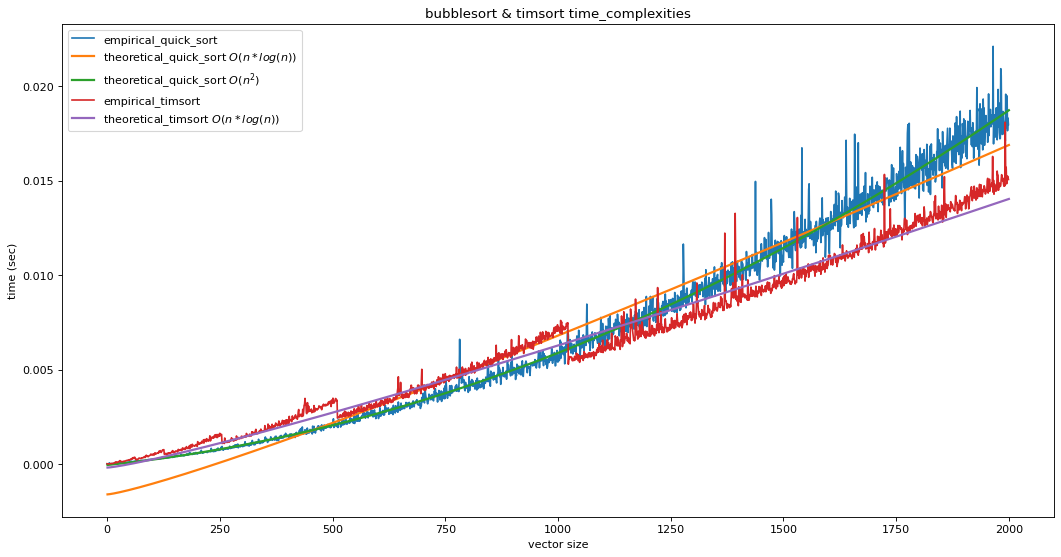

In [46]:
plt.figure(figsize=(16, 8), dpi=80)

X = np.log(np.arange(1, len(times_quicksort)+1)) * np.arange(1, len(times_quicksort)+1)
coef = np.polyfit(X, times_quicksort, deg=1)
y = np.polyval(coef, X)

plt.plot(np.arange(len(times_quicksort)), times_quicksort, label='empirical_quick_sort')
plt.plot(np.arange(1, len(times_quicksort)+1), y, label='theoretical_quick_sort $O(n * log(n))$', linewidth=2)

X = np.arange(1, len(times_quicksort)+1)
coef = np.polyfit(X, times_quicksort, deg=2)
y = np.polyval(coef, X)

plt.plot(np.arange(1, len(times_quicksort)+1), y, label='theoretical_quick_sort $O(n^2)$', linewidth=2)


X = np.log(np.arange(1, len(times_tim_sort)+1)) * np.arange(1, len(times_tim_sort)+1)
coef = np.polyfit(X, times_tim_sort, deg=1)
y = np.polyval(coef, X)

plt.plot(np.arange(len(times_tim_sort)), times_tim_sort, label='empirical_timsort')
plt.plot(np.arange(1, len(times_tim_sort)+1), y, label='theoretical_timsort $O(n * log(n))$', linewidth=2)


plt.ylabel("time (sec)")
plt.xlabel("vector size")
plt.title("bubblesort & timsort time_complexities")
plt.legend()
plt.savefig(f"./figures/bubblesort_n_timesort_time_complexities.png")

## theoretical time complexity of matrix product for 𝐴 and 𝐵 of size 𝑛 × 𝑛 with non-negative elements: O($n^3$)

In [47]:
def matrix_product(row1, col1, m1, row2, col2, m2):
    res = [[0 for i in range(col2)] for j in range(row1)]
    if (row2 != col1):
        print("Matrix multiplication is not possible")
        return None

    for i in range(row1):
        for j in range(col2):
            res[i][j] = 0
            for k in range(row2):
                res[i][j] += m1[i][k] * m2[k][j]

    return res


n = 3
A = np.random.randint(BORDER, size=(n, n))
B = np.random.randint(BORDER, size=(n, n))

matrix_product(n, n, A, n, n, B), np.matmul(A, B)


([[458, 380, 432], [455, 441, 520], [375, 309, 251]],
 array([[458, 380, 432],
        [455, 441, 520],
        [375, 309, 251]]))

In [48]:
N = 430

times_mp = []

for n in tqdm_notebook(range(1, N+1)):
    A = np.random.randint(BORDER, size=(n, n))
    B = np.random.randint(BORDER, size=(n, n))
    
    start = time.time() 
  
    res = matrix_product(n, n, A, n, n, B)

    t = time.time() - start

    times_mp.append(t)


/opt/anaconda3/envs/algorithms-RD-practise/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/430 [00:00<?, ?it/s]

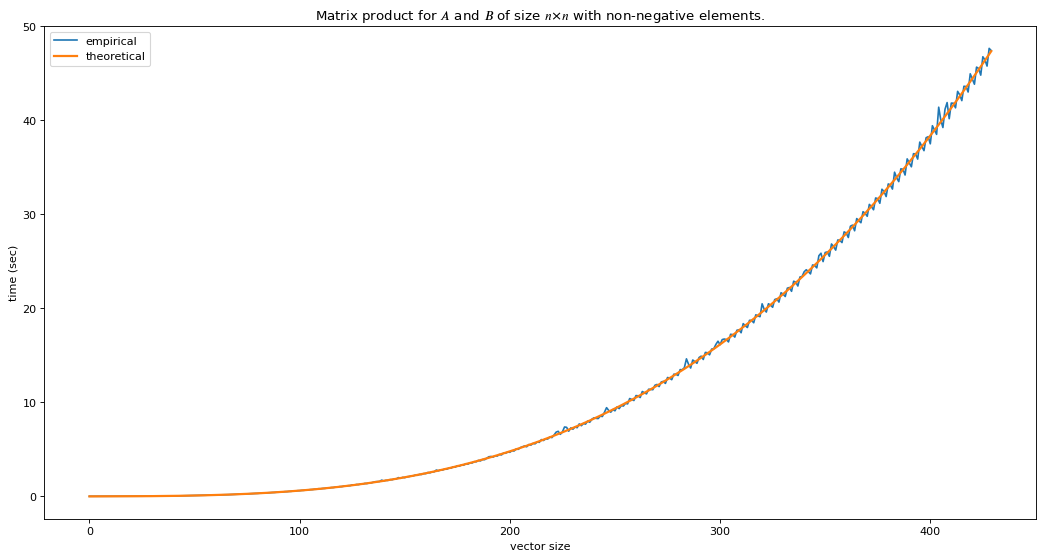

In [49]:
plt.figure(figsize=(16, 8), dpi=80)

X = np.arange(len(times_mp))
coef = np.polyfit(X, times_mp, deg=3)
y = np.polyval(coef, X)


plt.plot(np.arange(len(times_mp)), times_mp, label='empirical')

plt.plot(X, y, label='theoretical', linewidth=2)
plt.ylabel("time (sec)")
plt.xlabel("vector size")
plt.title("Matrix product for $𝐴$ and $𝐵$ of size $𝑛 × 𝑛$ with non-negative elements.")
plt.legend()
plt.savefig(f"./figures/matrix_product_time_complexities.png")